# Problem 1

Adapting the four Bellman Equations from page (100) of Rao's book to deterministic policy $\pi_{D}$:

1. $V^{\pi_{D}}(s) = max_{a \in A} Q^{\pi_{D}}(s, a),\ \forall s \in N$
2. $Q^{\pi_{D}}(s, a) = R(s, a) + \gamma * \sum_{s' \in N} P(s, a, s')V^{\pi_{D}}(s'),\ \forall s \in N,\ \forall a \in A$ 
3. $V^{\pi_{D}}(s) = R(s, \pi_{D}(s)) + \gamma * \sum_{s' \in N} P(s, \pi_{D}(s), s')V^{\pi_{D}}(s') ,\ \forall s \in N$ 
4. $Q^{\pi_{D}}(s, a) = R(s, a) + \gamma * \sum_{s' \in N} P(s, a, s') * Q^{\pi_{D}}(s', \pi_{D}(s')),\ \forall s \in N,\ \forall a \in A$ 

# Problem 2

## Computing V*
$\textbf{Quick Answer: } V^{*}(s) = \frac{9}{4},\ \forall s \in N$  

### My Proof

$$
V^{*}(s) = \max_{a \in A}\ R(s, a) + \gamma * \sum_{s' \in N} P(s, a, s')V^{*}(s') ,\ \forall s \in N
$$ 

where $\gamma = 1/2$.  

In this problem, the rewards function is:

$$
  R(s, a) = P(s+1\ \|\ s) * R(s+1\ \|\ s) + P(s\ \|\ s) * R(s\ \|\ s) \\ 
          = (1-a) * a + (1+a)*(1-a) = (1-a)*(1+2a) = 1 + a - 2*a^{2}
$$

The reward is only a function of $a$, is the same for all states, so $R(s, a) = R(a)$. The function is maximized at $a = 1/4$, so $R(1/4) = 9/8$. 

Moreover, the rewards and the transition probabilities from $s \rightarrow s+1$ and $s \rightarrow s$ are the same $\forall s \in N$.  

I think that we can collapse this infinite state space of Natural Numbers to the Finite MDP with state space equal field $Z_{2}$ consisting of the states $\{1, 2\}$, where $1 = (2+1)\ mod\ 2$.  

So we have the following system:

$\begin{bmatrix} V^{*}(1) \\ V^{*}(2) \end{bmatrix}$ = $\max_{a \in A}\ \overrightarrow{1}*(9/8) + (1/2) * 
\begin{bmatrix} \ a\ \ \ \ \ (1-a) \newline (1-a)\ \ \ \ \ a  \end{bmatrix}$ $* \begin{bmatrix} V^{*}(1) \\ V^{*}(2) \end{bmatrix}$

If the above is valid, then we can see from the above that $V^{*}$ is the same for all states $s \in N$.  

$$
V^{*}(s) = (9/8) + (1/2)*V^{*}(s)
$$
so $V^{*}(s) = \frac{9}{4},\ \forall s \in N$.

## Optimal Deterministic Policy
Based on the results from part (1), the optimal policy $\forall s \in S$ is $a = \frac{1}{4}$.

# Problem 3

State space $S = \{0, 1, \dots, N-1, N\}$, Terminal states $T \subset S = \{0, N\}$  

Action/Croak $A \rightarrow 0$, and $B \rightarrow 1$  

Reward Function:  
$R(\_,\_,\ 0) = -10$  
$R(\_,\_,\ N) = 10$  
$R(\_,\_,\ j) = 0,\ j \neq 0,\ j \neq N$

Transition Probabilities:  
$P(0, \{0,\ 1\}, 0) = 1$  
$P(N, \{0,\ 1\}, N) = 1$  

$P(i, 0, i-1) = \frac{i}{N},\ i \in [1, N-1]$  
$P(i, 0, i+1) = 1 - \frac{i}{N},\ i \in [1, N-1]$  
$P(i, 0, i-1) = \frac{i}{N},\ i \in [1, N-1]$  
$P(i, 0, i+1) = 1 - \frac{i}{N},\ i \in [1, N-1]$ 

$P(i, 1, j) = \frac{1}{N},\ i \in [1, N-1],\ j\ \neq i,\ j \in [0, N]$   



In [54]:
import sys
sys.path.append("../rl/")

from markov_decision_process import FiniteMarkovDecisionProcess, FinitePolicy
from distribution import Categorical, Choose, Constant
from collections import defaultdict
import numpy as np
import seaborn as sns

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def get_frog_MDP(N=10):
    action_mapping = {}

    action_mapping[0], action_mapping[N] = None, None
    
    reward_func = lambda s: 10.0*(s==N) - 10.0*(s==0)
    
    for i in range(1, N, 1):
        action_mapping[i] = {
            '0': Categorical({ (i-1, reward_func(i-1)):(i/N), (i+1, reward_func(i+1)):(1-(i/N)) }),
            '1': Categorical({ (j, reward_func(j)): (1/N) for j in range(0, N+1, 1) if j != i })
        }
    
    return FiniteMarkovDecisionProcess(action_mapping)
    

In [34]:
def generate_binary_vectors(n):
    return [ list(f'{i:0{n}b}') for i in range(0, 2**n, 1) ]

def create_policy_from_binary_vector(bin_vec):
    mapping = {}
    for i, k in enumerate(bin_vec):
        mapping[i] = Constant(k)

    policy = FinitePolicy(mapping)
    return policy

create_policy_from_binary_vector( generate_binary_vectors(5)[0] ) 

For State 0:
  Do Action 0 with Probability 1.000
For State 1:
  Do Action 0 with Probability 1.000
For State 2:
  Do Action 0 with Probability 1.000
For State 3:
  Do Action 0 with Probability 1.000
For State 4:
  Do Action 0 with Probability 1.000

In [48]:
def get_optimal_policy(finite_mdp):
    N = len(finite_mdp.states())
    
    current_max, current_v = None, None
    
    for policy_vector in generate_binary_vectors(N):
        policy = create_policy_from_binary_vector( policy_vector ) 
        finite_mrp = finite_mdp.apply_finite_policy( policy )
        tmp_vec = finite_mrp.get_value_function_vec(gamma=1)
        
        if (current_max is None) or (np.sum(tmp_vec) > current_max):
            current_max, current_v = np.sum(tmp_vec), tmp_vec
    
    return current_v


In [50]:
def get_optimal(N):
    finite_mdp = get_frog_MDP(N)
    return get_optimal_policy(finite_mdp)

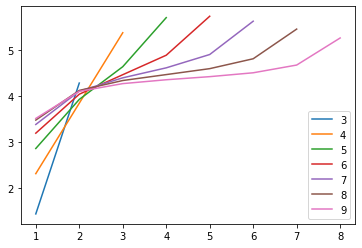

In [58]:
for j in range(3, 10, 1):
    ys = get_optimal(j)
    xs = np.arange(1, j, 1)
    sns.lineplot(x=xs, y=ys, label=f"{j}")

# Problem 4


$\textbf{Quick Answer:}\ V^{*} = e^{\frac{-s^{2}}{2*\sigma^{2}}}$ or $a^{*} = \frac{-s}{\sigma^{2}}$

### Proof

Because $\gamma = 0$, we have:
$$
  V*(s) = min_{a \in A} \{ R(s, a) \} \\
        = min_{a \in A} \{ E[ e^{as'} ] \} \\
        = min_{a \in A}\ \{\ \frac{1}{\sigma * \sqrt{2\pi}} \int_{s'} e^{as'} * e^{ \frac{-(s'-s)^{2}}{2*\sigma^{2}}}\ \} \\
        = min_{a \in A}\ \{\ e^{s*a\ +\ \sigma^{2}*a^{2}/2}\ \frac{1}{\sigma * \sqrt{2\pi}} * \int_{s'} e^{ \frac{-(s'-(s + a*\sigma^{2}))^{2}}{2*\sigma^{2}}}\ \} \\
        = min_{a \in A}\ \{\ e^{s*a\ +\ \sigma^{2}*a^{2}/2}\ \} 
$$

For each state $s$, we want to find:
$$
    \pi(s) = argmin_{a \in A}\ \{\ e^{s*a\ +\ \sigma^{2}*a^{2}/2}\ \} 
$$
  
The optimal action mapping $s \rightarrow a$ that is the solution of the above, is also the solution to the log of the above, or:
$$
    \pi(s) = argmin_{a \in A}\ \{\ s*a\ +\ \sigma^{2}*a^{2}/2 \} 
$$
  
Taking the partial derivative with respect to $a$ and setting to zero:  
$$
  s + \sigma^{2}*a = 0\ \rightarrow\ a = \frac{-s}{\sigma^{2}}
$$  
  
Plugging the optimal $a*(s)$ into the expression for $V*$ above:

$$
    V^{*}(s) = e^{\frac{-s^{2}}{\sigma^{2}}\ +\ \sigma^{2}*(\frac{-s}{\sigma^{2}})^{2}/2} \\
          = e^{\frac{-s^{2}}{2*\sigma^{2}}}
$$